In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/PetImages/PetImages/train'
test_dir = '/content/drive/MyDrive/PetImages/PetImages/test'

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(2,activation='softmax')(x) #2개로 이진분류

/tmp/ipython-input-2835051102.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=Model(inputs=base_model.input,outputs=preds) #앞 파트 뒷 파트 붙여서 최종 모델 만드는 함수 (중요)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, None, None, 32) │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, None, None, 32) │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, None, None, 64) │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, None, None, 64) │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, None, None, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, None, None,     │         8,192 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, None, None,     │         1,152 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, None, None,     │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,853,890 (22.33 MB)

 Trainable params: 5,832,002 (22.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

global_average_pooling부터가 우리가 만든거

In [ ]:
for layer in model.layers[:20]: #동결
    layer.trainable=False #훈련 가능하지 않다
for layer in model.layers[20:]: #미세조정
    layer.trainable=True #훈련 가능하다

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/PetImages/PetImages/',
                                                 target_size=(128,128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical', #biinary면 binary라 써주기
                                                 shuffle=True)

Found 2200 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit(train_generator, #학습하는 과정에서 layer.trainable=True  부분이 바뀐다
                   steps_per_epoch=step_size_train,
                   epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 401s 6s/step - accuracy: 0.8697 - loss: 0.6169
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 199us/step - accuracy: 0.9688 - loss: 0.1422
Epoch 3/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


68/68 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9083 - loss: 0.2985
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 187us/step - accuracy: 0.9688 - loss: 0.1848
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9140 - loss: 0.2180


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Get a list of all image files in the test directory for dogs
test_dog_files = os.listdir(os.path.join(test_dir, 'dog'))

# Select one image file (e.g., the first one)
img_path = os.path.join(test_dir, 'dog', test_dog_files[0])

# Load and preprocess the image for dog
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale the image

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Print the prediction based on the class index
if predicted_class_index == 1:
    print(f"Prediction: Dog")
else:
    print(f"Prediction: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
Prediction: Dog


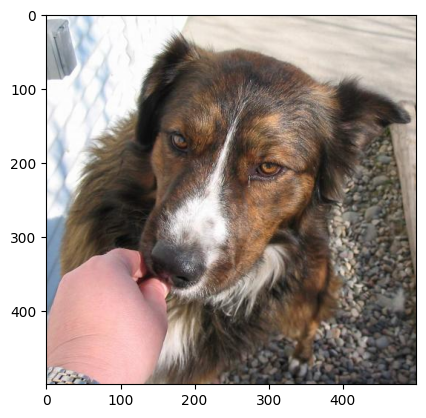

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

image = imread(img_path)
pyplot.imshow(image)
pyplot.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Get a list of all image files in the test directory for dogs
test_cat_files = os.listdir(os.path.join(test_dir, 'cat'))

# Select one image file (e.g., the first one)
img_path = os.path.join(test_dir, 'cat', test_cat_files[0])

# Load and preprocess the image for cat
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale the image

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Print the prediction based on the class index
if predicted_class_index == 1:
    print(f"Prediction: Dog")
else:
    print(f"Prediction: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction: Dog


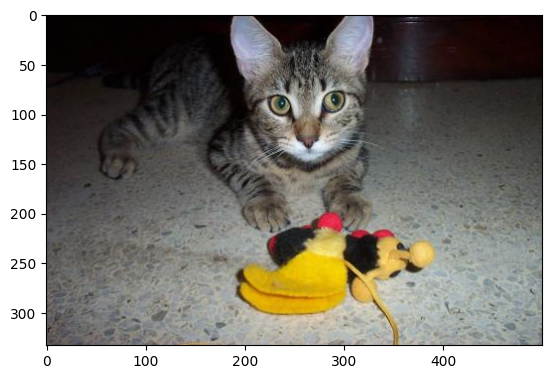

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

image = imread(img_path)
pyplot.imshow(image)
pyplot.show()